<a href="https://colab.research.google.com/github/Chiranjit680/Yieldpulse/blob/main/HackathonModelTry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('reddit_finance.csv')

# Drop unnecessary columns
columns_to_keep = [
    'age', 'edu', 'rel_status', 'children', 'country', 'edu_status',
     'home_value', 'cash', 'student_loans',
    'mortgage', 'auto_loan', 'credit_personal_loan', 'medical_debt',
     'other_debt', '2020_gross_inc', '2020_invst_save'
]
df = df[columns_to_keep]

# Ensure all values in the 'age' column are strings and remove '<18'
df['age'] = df['age'].astype(str)
df = df[df['age'] != '<18']

# Function to calculate the midpoint of an age range
def calculate_midpoint(age_range):
    if '-' in age_range:
        start, end = map(int, age_range.split('-'))
        return (start + end) / 2
    else:
        return float(age_range)

# Apply the function to the 'age' column to update it with midpoints
df['age'] = df['age'].apply(calculate_midpoint)

# Country PPP and currency conversion rates (use the dictionaries you provided)



# Apply PPP and currency conversion to relevant columns
monetary_columns = ['home_value', 'cash', 'student_loans', 'mortgage',
                    'auto_loan', 'credit_personal_loan', 'medical_debt',
                     'other_debt', '2020_gross_inc', '2020_invst_save']
ppp_dict = {
    'Australia': 1.4,
    'Austria (EU)': 1.3,
    'Belgium': 1.2,
    'Brazil': 0.8,
    'Canada': 1.5,
    'China': 1.7,
    'Colombia': 0.6,
    'Cyprus': 1.1,
    'Czech Republic': 1.0,
    'Czechia': 1.0,
    'Denmark': 1.3,
    'Eastern Europe': 0.9,
    'England': 1.4,
    'Estonia': 1.0,
    'European Union': 1.2,
    'Eurpoean Union': 1.2,
    'Europe': 1.1,
    'Finland': 1.3,
    'France': 1.2,
    'Germany': 1.2,
    'Ghana': 0.5,
    'Hong Kong': 1.4,
    'Hungary': 1.0,
    'India': 1.0,
    'Ireland': 1.3,
    'Israel': 1.4,
    'Italy': 1.2,
    'Japan': 1.5,
    'Kuwait': 1.6,
    'Laos': 0.6,
    'Latvia': 1.0,
    'Malaysia': 0.8,
    'Netherlands': 1.3,
    'New Zealand': 1.4,
    'Norway': 1.5,
    'Not Disclosing. All Answers Are In USD': 1.0,
    'Poland': 1.0,
    'Portugal': 1.1,
    'Romania': 0.9,
    'S.E. Asia': 0.7,
    'Saudi Arabia': 1.4,
    'Singapore': 1.6,
    'Slovakia': 1.0,
    'Slovenia': 1.0,
    'South Korea': 1.3,
    'Sweden': 1.4,
    'Switzerland': 1.6,
    'Taiwan': 1.2,
    'Thailand': 0.8,
    'UAE': 1.5,
    'UK': 2.4,
    'United Kingdom': 1.4,
    'US Armed Forces': 1.0,
    'United States': 1.5
}

currency_conversion_rates = {
    'Australia': 55.0,  # 1 AUD = 55 INR
    'Austria (EU)': 85.0,  # 1 EUR = 85 INR
    'Belgium': 85.0,  # 1 EUR = 85 INR
    'Brazil': 15.0,  # 1 BRL = 15 INR
    'Canada': 60.0,  # 1 CAD = 60 INR
    'China': 12.0,  # 1 CNY = 12 INR
    'Colombia': 0.02,  # 1 COP = 0.02 INR
    'Cyprus': 85.0,  # 1 EUR = 85 INR
    'Czech Republic': 3.5,  # 1 CZK = 3.5 INR
    'Czechia': 3.5,  # 1 CZK = 3.5 INR
    'Denmark': 11.5,  # 1 DKK = 11.5 INR
    'Eastern Europe': 85.0,  # Assuming EUR for Eastern Europe
    'England': 100.0,  # 1 GBP = 100 INR
    'Estonia': 85.0,  # 1 EUR = 85 INR
    'European Union': 85.0,  # 1 EUR = 85 INR
    'Eurpoean Union': 85.0,  # 1 EUR = 85 INR
    'Europe': 85.0,  # Assuming EUR for Europe
    'Finland': 85.0,  # 1 EUR = 85 INR
    'France': 85.0,  # 1 EUR = 85 INR
    'Germany': 85.0,  # 1 EUR = 85 INR
    'Ghana': 15.0,  # 1 GHS = 15 INR
    'Hong Kong': 10.0,  # 1 HKD = 10 INR
    'Hungary': 0.23,  # 1 HUF = 0.23 INR
    'India': 1.0,  # 1 INR = 1 INR
    'Ireland': 85.0,  # 1 EUR = 85 INR
    'Israel': 23.0,  # 1 ILS = 23 INR
    'Italy': 85.0,  # 1 EUR = 85 INR
    'Japan': 0.67,  # 1 JPY = 0.67 INR
    'Kuwait': 250.0,  # 1 KWD = 250 INR
    'Laos': 0.005,  # 1 LAK = 0.005 INR
    'Latvia': 85.0,  # 1 EUR = 85 INR
    'Malaysia': 17.0,  # 1 MYR = 17 INR
    'Netherlands': 85.0,  # 1 EUR = 85 INR
    'New Zealand': 50.0,  # 1 NZD = 50 INR
    'Norway': 8.5,  # 1 NOK = 8.5 INR
    'Not Disclosing. All Answers Are In USD': 74.0,  # 1 USD = 74 INR
    'Poland': 18.5,  # 1 PLN = 18.5 INR
    'Portugal': 85.0,  # 1 EUR = 85 INR
    'Romania': 17.0,  # 1 RON = 17 INR
    'S.E. Asia': 74.0,  # Assuming USD for S.E. Asia
    'Saudi Arabia': 20.0,  # 1 SAR = 20 INR
    'Singapore': 54.0,  # 1 SGD = 54 INR
    'Slovakia': 85.0,  # 1 EUR = 85 INR
    'Slovenia': 85.0,  # 1 EUR = 85 INR
    'South Korea': 0.065,  # 1 KRW = 0.065 INR
    'Sweden': 8.5,  # 1 SEK = 8.5 INR
    'Switzerland': 80.0,  # 1 CHF = 80 INR
    'Taiwan': 2.6,  # 1 TWD = 2.6 INR
    'Thailand': 2.4,  # 1 THB = 2.4 INR
    'UAE': 20.0,  # 1 AED = 20 INR
    'UK': 100.0,  # 1 GBP = 100 INR
    'United Kingdom': 100.0,  # 1 GBP = 100 INR
    'US Armed Forces': 74.0,  # 1 USD = 74 INR
    'United States': 74.0  # 1 USD = 74 INR
}


for col in monetary_columns:
    df[col] = df.apply(lambda row: row[col] * currency_conversion_rates.get(row['country'], 1) / ppp_dict.get(row['country'], 1), axis=1)

# Drop missing values
df['auto_loan'] = df['auto_loan'].fillna(0)
df['mortgage'] = df['mortgage'].fillna(0)
df['credit_personal_loan'] = df['credit_personal_loan'].fillna(df['credit_personal_loan'].mean())
df['student_loans'] = df['student_loans'].fillna(0)
df['medical_debt'] = df['medical_debt'].fillna(0)
df['2020_gross_inc'] = df['2020_gross_inc'].fillna(df['2020_gross_inc'].mean())


df['home_value']=df['home_value'].fillna(0)
df['other_debt']=df['other_debt'].fillna(0)

df['cash']=df['cash'].fillna(0)
df.dropna(inplace=True)

for col in monetary_columns:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  df[col]=df[col][~(df[col] > (Q3 + 1.2 * IQR))]
# Define target variable and feature variables

In [9]:
X = df.drop(columns=['2020_invst_save'], axis=1)
y = df['2020_invst_save']

y=y.fillna(0)

# One-hot encode categorical features
X = pd.get_dummies(X, columns=['edu', 'children','country','rel_status', 'edu_status'])
y=pd.DataFrame(y)
X=X.fillna(0)
X
type(X)
type(y)

# X.to_csv('processed_reddit_finance.csv', index=False)
# from google.colab import files
# files.download('processed_reddit_finance.csv')

pandas.core.frame.DataFrame

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fill missing values with SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Convert back to DataFrame to use column names
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_df)
X_test_scaled = scaler.transform(X_test_df)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

<ipython-input-11-ec7919b649a5>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(X_train_scaled, y_train)


R2 Score: 0.21575455355583162


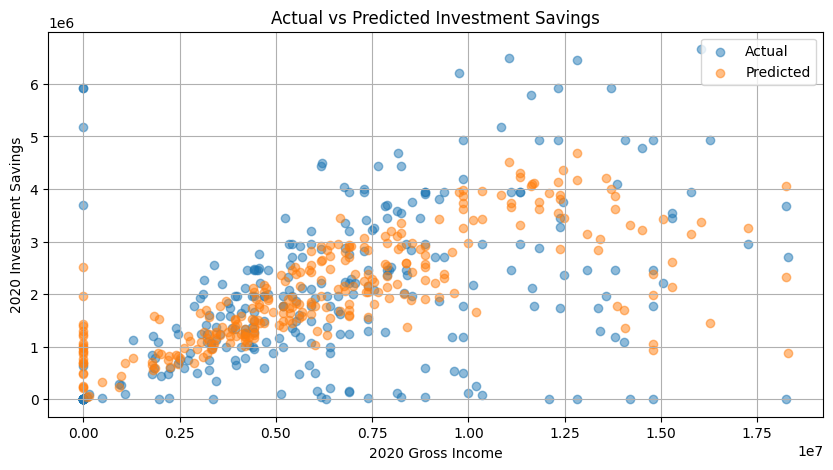

In [11]:
# Split the data into training and testing sets


# Train the model
model1 = RandomForestRegressor(n_estimators=1000, random_state=42)
model1.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred = model1.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)

print(f"R2 Score: {r2}")

# Plotting
plt.figure(figsize=(10, 5))
plt.scatter(X_test_df['2020_gross_inc'], y_test, label='Actual', alpha=0.5)
plt.scatter(X_test_df['2020_gross_inc'], y_pred, label='Predicted', alpha=0.5)
plt.xlabel('2020 Gross Income')
plt.ylabel('2020 Investment Savings')
plt.title('Actual vs Predicted Investment Savings')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
new_data = pd.DataFrame({
    'age': [30],
    'edu': ["Bachelor's degree"],
    'rel_status': ['Single'],
    'children': [0],
    'country': ['United States'],
    'edu_status': ['Employed'],
    'home_value': [0],
    'cash': [10000],
    'student_loans': [20000],
    'mortgage': [0],
    'auto_loan': [15000],
    'credit_personal_loan': [5000],
    'medical_debt': [0],
    'other_debt': [0],
    '2020_gross_inc': [75000]
})

# Reshape new_data_imputed to a 2D array with a single feature
new_data_imputed = new_data_imputed.reshape(-1, 1)

# Apply the scaler
new_data_scaled = scaler.transform(new_data_imputed)

# Reshape back to original shape if necessary
new_data_scaled = new_data_scaled.reshape(1, -1) # Reshape back to (1, 74) for prediction

# Make predictions
prediction = model1.predict(new_data_scaled)

print(f"Predicted 2020 investment savings: {prediction[0]:.2f}")

Predicted 2020 investment savings: 633237.50
